# Introduciton

In [ ]:
"""
What? Pixel importances with a parallel forest of trees

This example shows the use of forests of trees to evaluate the impurity-based importance of the pixels in an 
image classification task (faces). The hotter the pixel, the more important.

"""

# Import modules

In [1]:
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

# Load the dataset

In [ ]:
# Load the faces dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

# Create model

In [ ]:
"""
This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
"""

In [11]:
# Number of CPU cores to use to perform parallel fitting of the forest model
n_jobs = -1

# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))

Fitting ExtraTreesClassifier on faces data with -1 cores...
done in 1.364s


In [ ]:
"""
The impurity-based feature importances. The higher, the more important the feature. The importance of a feature
is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as 
the Gini importance. Warning: impurity-based feature importances can be misleading for high cardinality features.
"""

In [13]:
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

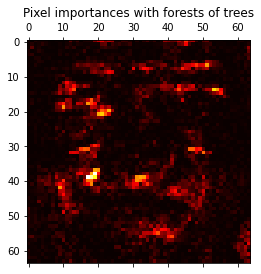

In [14]:
# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py

</font>
</div>